# RecSys - AIS-F20: Model benchmarking

## Instructions

For this assignment, you need to benchmark the following models using RMSE, MAE and fit-time / prediction-time:

* User-based CF with cosine similarity.
* User-based CF with pearson correlation similarity.
* Item-based CF with cosine similarity.
* Item-based CF with pearson correlation similarity.
* SVD
* NMF

**Note** :
* You should visualize your benchmarking results with a bar chart and to interepret them
* You shouldn't implement the models from scratch, you need to use their surprise implementation.

**Notebook** :

Your notebook should be leasable, well organized and commented. It should contain 3 separate parts :
* Data loading
* Utils
* Model benchmarking

**Submission** :

You need to push your code in a github repository and to send the link in the assignment tab.

## Data loading

In [86]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV

In [87]:
clean_df = pd.read_csv("./movies_db/cleaned_movie_ratings.csv")
clean_df.head()

,Unnamed: 0,userId,movieId,rating,timestamp,title,genres,Drama,Animation,Children,...,Horror,Romance,Comedy,Crime,Western,Mystery,IMAX,Documentary,Film-Noir,(no genres listed)
0,0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
data_df = clean_df.iloc[:, 1:5]
data_df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
81517,664,34405,4.0,1343732038
81518,664,71530,4.0,1393891216
81519,664,80846,4.0,1344436046
81520,664,8950,4.5,1343747045


<AxesSubplot:>

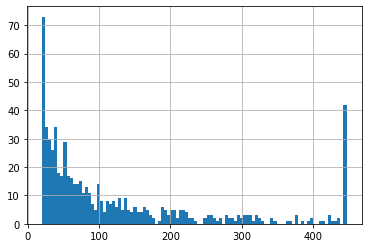

In [89]:
data_df["userId"].value_counts().hist(bins = 100)

### Loading the data into Surprise

In [90]:
# Saving the data to a file
data_df.to_csv("./movies_db/cleaned_movie_ratings_redux.csv",index=False, header=True)

# Creating the reader instance
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)

# Loading the dataset to a surprise dataset
data = Dataset.load_from_file("./movies_db/cleaned_movie_ratings_redux.csv", reader=reader)

## Utils

In [91]:
def parse_gridsearch_results(gridsearch_results):
    results = {}
    model_name = ""

    params = gridsearch_results.get('params')
    for i in range(len(params)):
        if params[i]['sim_options']['user_based']:
            model_name = params[i]['sim_options']['name'] + "_user_based"
        else:
            model_name = params[i]['sim_options']['name'] + "_item_based"
        results[model_name] = {}
        results[model_name]['rmse'] = gridsearch_results['mean_test_rmse'][i]
        results[model_name]['mae'] = gridsearch_results['mean_test_mae'][i]
        results[model_name]['fit_time'] = gridsearch_results['mean_fit_time'][i]
        results[model_name]['test_time'] = gridsearch_results['mean_test_time'][i]
    
    return results


In [92]:
def parse_cv(cv_result, model_name):
    results = {}
    results[model_name] = {}
    results[model_name]['rmse'] = np.mean(cv_result['test_rmse'])
    results[model_name]['mae'] = np.mean(cv_result['test_mae'])
    results[model_name]['fit_time'] = np.mean(cv_result['fit_time'])
    results[model_name]['test_time'] = np.mean(cv_result['test_time'])

    return results

## Model Benchmarking

### Using GridSearchCV to create the results for 

* User-based CF with cosine similarity.
* User-based CF with pearson correlation similarity.
* Item-based CF with cosine similarity.
* Item-based CF with pearson correlation similarity.

In [93]:
sim_options = {'name': ['pearson_baseline', 'cosine'],
               'user_based': [False, True]
               }
param_grid = {'k': [40],
              'sim_options': sim_options}

gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity ma

In [94]:
# SVD Cross Validation
algo = SVD()
cv_svd = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8873  0.8922  0.8901  0.8994  0.8978  0.8934  0.0046  
MAE (testset)     0.6831  0.6852  0.6866  0.6929  0.6893  0.6874  0.0034  
Fit time          3.45    3.44    3.49    3.54    3.47    3.48    0.03    
Test time         0.09    0.09    0.09    0.09    0.09    0.09    0.00    


In [95]:
# NMF Cross Validation
algo = NMF()
cv_nmf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9421  0.9456  0.9525  0.9492  0.9525  0.9484  0.0040  
MAE (testset)     0.7267  0.7257  0.7296  0.7299  0.7317  0.7287  0.0022  
Fit time          3.94    3.88    3.85    4.20    4.03    3.98    0.12    
Test time         0.08    0.08    0.32    0.08    0.09    0.13    0.10    


In [96]:
all_results = {**parse_gridsearch_results(gs.cv_results), **parse_cv(cv_svd, "SVD"), **parse_cv(cv_nmf, "NMF")}

In [97]:
all_results

{'pearson_baseline_item_based': {'rmse': 0.9620725013098362,
  'mae': 0.7282272112450524,
  'fit_time': 2.9981122811635337,
  'test_time': 3.1524985631306968},
 'pearson_baseline_user_based': {'rmse': 0.9979915991104208,
  'mae': 0.7691188497042267,
  'fit_time': 0.3066496054331462,
  'test_time': 1.2538599173227947},
 'cosine_item_based': {'rmse': 0.9800952599659686,
  'mae': 0.7600757086175566,
  'fit_time': 3.949289162953695,
  'test_time': 3.277857859929403},
 'cosine_user_based': {'rmse': 0.9826263510191039,
  'mae': 0.7584784757277981,
  'fit_time': 0.1943687597910563,
  'test_time': 1.2489103476206462},
 'SVD': {'rmse': 0.8933526719506263,
  'mae': 0.6874129547443053,
  'fit_time': 3.4783462047576905,
  'test_time': 0.09014663696289063},
 'NMF': {'rmse': 0.9483908594313156,
  'mae': 0.7287466033096003,
  'fit_time': 3.978021478652954,
  'test_time': 0.12851572036743164}}

### Result comparisson

In [98]:
models = []
values = []
for key, value in all_results.items():
    models.append(key)
    values.append(value)

values_df = pd.DataFrame(values, index=models)
values_df.head(6)

,rmse,mae,fit_time,test_time
pearson_baseline_item_based,0.962073,0.728227,2.998112,3.152499
pearson_baseline_user_based,0.997992,0.769119,0.306650,1.253860
cosine_item_based,0.980095,0.760076,3.949289,3.277858
cosine_user_based,0.982626,0.758478,0.194369,1.248910
SVD,0.893353,0.687413,3.478346,0.090147
NMF,0.948391,0.728747,3.978021,0.128516


Text(0.5, 1.0, 'Metric comparisson')

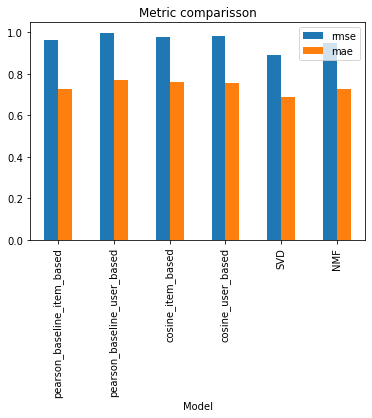

In [99]:
values_df.plot(y=['rmse', 'mae'], kind="bar")
plt.xlabel("Model")
plt.title("Metric comparisson")

Text(0.5, 1.0, 'Time comparisson')

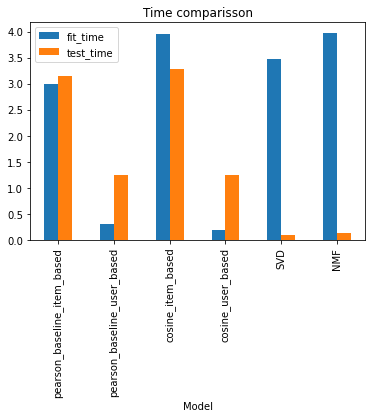

In [100]:
values_df.plot(y=['fit_time', 'test_time'], kind="bar")
plt.xlabel("Model")
plt.title("Time comparisson")